In [1]:
import tensorflow as tf

In [2]:
today_ts = tf.timestamp()%(24*60*60)
tf.print(today_ts)

29611.100488901138


In [3]:
tf.print(tf.timestamp())

1591258431.376889


In [4]:
#打印时间分割线
@tf.function
def printbar():
    today_ts = tf.timestamp()%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8+timestring)

In [5]:
printbar()

================================================================================16:16:45


In [6]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import tensorflow as tf

In [7]:
#样本数量
n = 400

In [8]:
X = tf.random.uniform(shape=[n, 2], minval=-10, maxval=10)
w0 = tf.constant([[2.], [-3.]])
b0 = tf.constant([[3.]])
Y = X@w0 + b0 + tf.random.normal([n, 1], mean=0.0, stddev=2.0)

In [9]:
# 数据可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

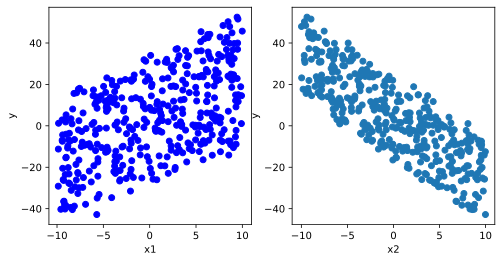

In [14]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:,0], c='b')
plt.xlabel('x1')
plt.ylabel("y")

ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0])
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

In [38]:
def data_iter(feature, lables, batch_size=8):
#     print(feature.shape, lables.shape)
    num_sample = len(feature)
#     print(num_sample)
    indices = list(range(num_sample))
    np.random.shuffle(indices)
    for i in range(0, num_sample, batch_size):
        indexs = indices[i: min(i+batch_size, num_sample)]
        yield tf.gather(feature, indexs), tf.gather(lables, indexs)

batch_size = 8
it = data_iter(X, Y, batch_size=8)
(feature, lables) = next(it)
print(feature)
print(lables)
(feature, lables) = next(it)
print(feature)
print(lables)
        

tf.Tensor(
[[ 5.9053183 -8.772156 ]
 [-1.4937191 -4.1961503]
 [ 1.8887997  5.980427 ]
 [ 7.616791   8.119123 ]
 [ 1.9776134 -1.0039616]
 [ 6.268959  -9.2352915]
 [ 5.961089   7.4177246]
 [ 3.040821  -6.4921737]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[ 42.059906]
 [ 13.587686]
 [-14.999258]
 [ -6.859369]
 [  9.660245]
 [ 44.08823 ]
 [ -8.363721]
 [ 32.063164]], shape=(8, 1), dtype=float32)
tf.Tensor(
[[-7.9213643   3.915308  ]
 [ 6.749359    8.1991005 ]
 [-6.5141654   4.983921  ]
 [-1.3948803  -0.90275574]
 [-6.523044   -1.3814564 ]
 [ 1.9939137   1.8037624 ]
 [ 9.270679    3.4582043 ]
 [-3.5038853  -1.8852949 ]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[-26.150982 ]
 [ -4.40213  ]
 [-21.86471  ]
 [  0.5745778]
 [ -8.637638 ]
 [  1.9980359]
 [ 12.191727 ]
 [  1.8473234]], shape=(8, 1), dtype=float32)


In [27]:
w = tf.Variable(tf.random.normal(w0.shape))
b = tf.Variable(tf.zeros_like(b0, dtype=tf.float32))

class LinearRegression:
    def __call__(self, x):
        return x@w + b
    def loss_func(self, y_true, y_pred):
        return tf.reduce_mean((y_true - y_pred)**2/2)

In [28]:
model = LinearRegression()

def train_model(model, feature, labels):
    with tf.GradientTape() as tape:
        pred = model(feature)
        loss = model.loss_func(labels, pred)
    dw, db = tape.gradient(loss, [w, b])
    w.assign(w - 0.0001*dw)
    b.assign(b - 0.0001*db)
    return loss
    

In [29]:
(feature, lables) = next(data_iter(X, Y))

(400, 2) (400, 1)
400
0 400


In [32]:
train_model(model,feature,lables)

<tf.Tensor: shape=(), dtype=float32, numpy=52.1482>

In [39]:
def train(model, epochs = 200):
    for epoch in range(1, epochs+1):
        for features, labels in data_iter(X, Y):
            loss = train_model(model, features, labels)
        if epoch%50 == 0:
            printbar()
            tf.print('epoch=', epoch, 'loss=', loss)
            tf.print('w = ', w)
            tf.print('b = ', b)


================================================================================17:24:53
epoch= 50 loss= 1.37899232
w =  [[1.971843]
 [-3.02454901]]
b =  [[2.23490453]]
================================================================================17:24:57
epoch= 100 loss= 1.69101262
w =  [[1.96968949]
 [-3.02446771]]
b =  [[2.43401837]]
================================================================================17:25:00
epoch= 150 loss= 2.96049333
w =  [[1.9679842]
 [-3.02431345]]
b =  [[2.58924961]]
================================================================================17:25:03
epoch= 200 loss= 2.28796339
w =  [[1.96707046]
 [-3.02368259]]
b =  [[2.71028757]]


In [40]:
train(model, epochs=300)

================================================================================17:25:56
epoch= 50 loss= 3.01301908
w =  [[1.96589911]
 [-3.02345777]]
b =  [[2.80467582]]
================================================================================17:26:00
epoch= 100 loss= 0.996559739
w =  [[1.96482062]
 [-3.02370286]]
b =  [[2.87825537]]
================================================================================17:26:03
epoch= 150 loss= 2.16705561
w =  [[1.96404219]
 [-3.02353597]]
b =  [[2.93562031]]
================================================================================17:26:06
epoch= 200 loss= 1.88297665
w =  [[1.96379149]
 [-3.0233264]]
b =  [[2.98032832]]
================================================================================17:26:10
epoch= 250 loss= 2.10435724
w =  [[1.96301854]
 [-3.02353692]]
b =  [[3.01520038]]
================================================================================17:26:13
epoch= 300 loss= 2.01546288
w =  [[1.96263671]
 [-3.

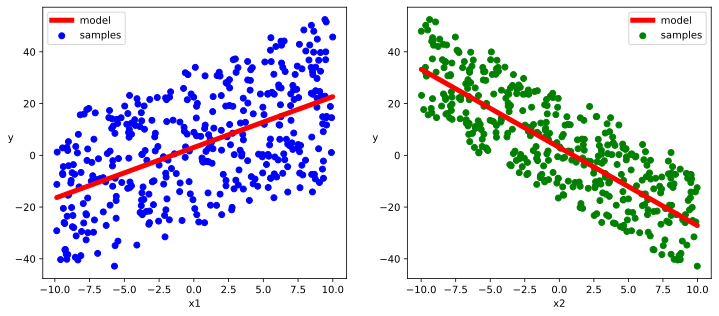

In [41]:
# 结果可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)


ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()

# DNN 二分类

In [42]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [66]:

#正负样本数量
n_positive,n_negative = 2000,2000

#生成正样本, 小圆环分布
r_p = 5.0 + tf.random.truncated_normal([n_positive,1],0.0,1.0)
theta_p = tf.random.uniform([n_positive,1],0.0,2*np.pi) 
Xp = tf.concat([r_p*tf.cos(theta_p),r_p*tf.sin(theta_p)],axis = 1)
Yp = tf.ones_like(r_p)

#生成负样本, 大圆环分布
r_n = 8.0 + tf.random.truncated_normal([n_negative,1],0.0,1.0)
theta_n = tf.random.uniform([n_negative,1],0.0,2*np.pi) 
Xn = tf.concat([r_n*tf.cos(theta_n),r_n*tf.sin(theta_n)],axis = 1)
Yn = tf.zeros_like(r_n)

#汇总样本
X = tf.concat([Xp,Xn],axis = 0)
Y = tf.concat([Yp,Yn],axis = 0)

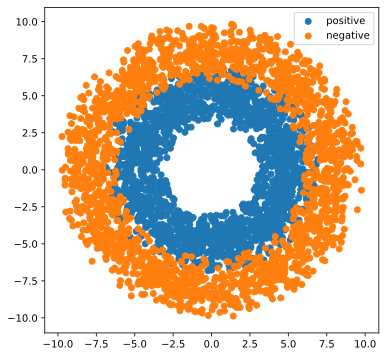

In [63]:
plt.figure(figsize=(6, 6))


plt.scatter(Xp[:, 0], Xp[:,1])
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.legend(["positive","negative"]);
plt.show()

In [57]:
display(Xp.shape, Yp.shape)

TensorShape([2000, 2])

TensorShape([2000, 1])

In [67]:
x = tf.concat([Xp, Xn], axis=0)
y = tf.concat([Yp, Yn], axis=0)

In [60]:
# 构建数据管道迭代器
def data_iter(features, labels, batch_size=8):
    num_examples = len(features)
    indices = list(range(num_examples))
    np.random.shuffle(indices)  #样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        indexs = indices[i: min(i + batch_size, num_examples)]
        yield tf.gather(features,indexs), tf.gather(labels,indexs)

In [68]:
# 测试数据管道效果   
batch_size = 10
(features,labels) = next(data_iter(X,Y,batch_size))
print(features)
print(labels)

tf.Tensor(
[[-2.245531   -2.9101362 ]
 [-6.1626596   5.444898  ]
 [ 5.712769   -6.0919886 ]
 [ 7.7636614   3.2256765 ]
 [ 0.32355708  4.2157955 ]
 [-6.8907976   2.2177277 ]
 [ 3.0519133   1.7641734 ]
 [-1.6552483  -2.9656997 ]
 [ 3.6734192   5.3757105 ]
 [ 1.5539833   2.872638  ]], shape=(10, 2), dtype=float32)
tf.Tensor(
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]], shape=(10, 1), dtype=float32)


In [79]:
class DNNClass(tf.Module):
    
    def __init__(self, name=None):
        super(DNNClass, self).__init__(name=name)
        self.w1 = tf.Variable(tf.random.truncated_normal([2, 4]), dtype=tf.float32)
        self.b1 = tf.Variable(tf.zeros([1, 4]), dtype=tf.float32)
        self.w2 = tf.Variable(tf.random.truncated_normal([4, 8]), dtype=tf.float32)
        self.b2 = tf.Variable(tf.zeros([1, 8]), dtype=tf.float32)
        self.w3 = tf.Variable(tf.random.truncated_normal([8, 1]), dtype=tf.float32)
        self.b3 = tf.Variable(tf.zeros([1, 1]), dtype=tf.float32)
    
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, 2], dtype=tf.float32)])
    def __call__(self, x):
        x = tf.nn.relu(x@self.w1 + self.b1, name='relu_1')
        x = tf.nn.relu(x@self.w2 + self.b2, name='relu_2')
        y = tf.nn.sigmoid(x@self.w3 + self.b3, name='sigmoid')
        return y
    
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, 1], dtype=tf.float32), tf.TensorSpec(shape=[None, 1], dtype=tf.float32)])
    def loss_func(self, y_true, y_pred):
        eps = 1e-7
        y_pred = tf.clip_by_value(y_pred, clip_value_min=eps, clip_value_max=(1-eps))
        los = -y_true * tf.math.log(y_pred) - (1-y_true) * tf.math.log(1-y_pred)
        return tf.reduce_mean(los)
    
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, 1], dtype=tf.float32), tf.TensorSpec(shape=[None, 1], dtype=tf.float32)])
    def metric_func(self, y_true, y_pred):
        y_pred = tf.where(y_pred > 0.5, tf.ones_like(y_pred, dtype=tf.float32), tf.zeros_like(y_pred, dtype=tf.float32))
        acc = tf.reduce_mean(1-tf.abs(y_true - y_pred))
        return acc
    
    
    

In [80]:
model = DNNClass()
# 测试模型结构
batch_size = 10
(features,labels) = next(data_iter(X,Y,batch_size))

predictions = model(features)

loss = model.loss_func(labels,predictions)
metric = model.metric_func(labels,predictions)

tf.print("init loss:",loss)
tf.print("init metric",metric)

init loss: 6.37806225
init metric 0.3


In [93]:
class DNNModel2(tf.Module):
    def __init__(self,name = None):
        super(DNNModel2, self).__init__(name=name)
        self.w1 = tf.Variable(tf.random.truncated_normal([2,4]),dtype = tf.float32)
        self.b1 = tf.Variable(tf.zeros([1,4]),dtype = tf.float32)
        self.w2 = tf.Variable(tf.random.truncated_normal([4,8]),dtype = tf.float32)
        self.b2 = tf.Variable(tf.zeros([1,8]),dtype = tf.float32)
        self.w3 = tf.Variable(tf.random.truncated_normal([8,1]),dtype = tf.float32)
        self.b3 = tf.Variable(tf.zeros([1,1]),dtype = tf.float32)

     
    # 正向传播
    @tf.function(input_signature=[tf.TensorSpec(shape = [None,2], dtype = tf.float32)])  
    def __call__(self,x):
        x = tf.nn.tanh(x@self.w1 + self.b1)
        x = tf.nn.tanh(x@self.w2 + self.b2)
        y = tf.nn.sigmoid(x@self.w3 + self.b3)
        return y
    
    # 损失函数(二元交叉熵)
    @tf.function(input_signature=[tf.TensorSpec(shape = [None,1], dtype = tf.float32),
                              tf.TensorSpec(shape = [None,1], dtype = tf.float32)])  
    def loss_func(self,y_true,y_pred):  
        #将预测值限制在 1e-7 以上, 1 - 1e-7 以下，避免log(0)错误
        eps = 1e-7
        y_pred = tf.clip_by_value(y_pred,eps,1.0-eps)
        bce = - y_true*tf.math.log(y_pred) - (1-y_true)*tf.math.log(1-y_pred)
        return  tf.reduce_mean(bce)
    
    # 评估指标(准确率)
    @tf.function(input_signature=[tf.TensorSpec(shape = [None,1], dtype = tf.float32),
                              tf.TensorSpec(shape = [None,1], dtype = tf.float32)]) 
    def metric_func(self,y_true,y_pred):
        y_pred = tf.where(y_pred>0.5,tf.ones_like(y_pred,dtype = tf.float32),
                          tf.zeros_like(y_pred,dtype = tf.float32))
        acc = tf.reduce_mean(1-tf.abs(y_true-y_pred))
        return acc
    

In [96]:
def test_model():
    model = DNNModel2()
    # 测试模型结构
    batch_size = 10
    (features,labels) = next(data_iter(X,Y,batch_size))

    predictions = model(features)

    loss = model.loss_func(labels,predictions)
    metric = model.metric_func(labels,predictions)

    tf.print("init loss:",loss)
    tf.print("init metric",metric)
    
test_model()

init loss: 1.10573459
init metric 0.5


In [104]:
##使用autograph机制转换成静态图加速

@tf.function
def train_step(model, features, labels):
    
    # 正向传播求损失
    with tf.GradientTape() as tape:
        predictions = model(features)
        loss = model.loss_func(labels, predictions) 
        
    # 反向传播求梯度
    grads = tape.gradient(loss, model.trainable_variables)
    
    # 执行梯度下降
    for p, dloss_dp in zip(model.trainable_variables,grads):
        p.assign(p - 0.001*dloss_dp)
        
    # 计算评估指标
    metric = model.metric_func(labels,predictions)
    
    return loss, metric


def train_model(model,epochs):
    for epoch in tf.range(1,epochs+1):
        for features, labels in data_iter(X,Y,100):
            loss,metric = train_step(model,features,labels)
        if epoch%100==0:
            printbar()
            tf.print("epoch =",epoch,"loss = ",loss, "accuracy = ", metric)
        
            

In [107]:
model = DNNClass()
train_model(model,epochs = 600)

================================================================================20:01:43
epoch = 100 loss =  0.635832191 accuracy =  0.55
================================================================================20:01:46
epoch = 200 loss =  0.578397691 accuracy =  0.66
================================================================================20:01:48
epoch = 300 loss =  0.597810268 accuracy =  0.61
================================================================================20:01:50
epoch = 400 loss =  0.57430023 accuracy =  0.72
================================================================================20:01:52
epoch = 500 loss =  0.487170458 accuracy =  0.89
================================================================================20:01:55
epoch = 600 loss =  0.420808613 accuracy =  0.96


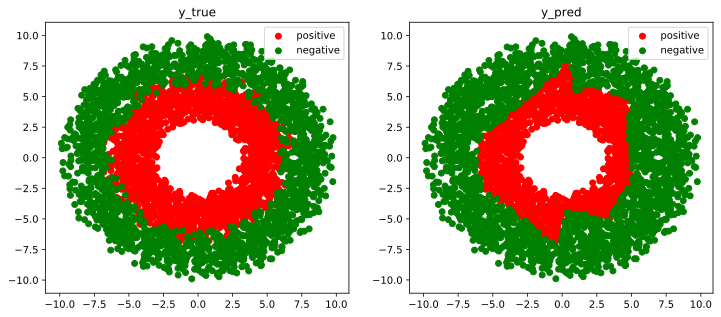

In [108]:
# 结果可视化
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
ax1.scatter(Xp[:,0],Xp[:,1],c = "r")
ax1.scatter(Xn[:,0],Xn[:,1],c = "g")
ax1.legend(["positive","negative"]);
ax1.set_title("y_true");

Xp_pred = tf.boolean_mask(X,tf.squeeze(model(X)>=0.5),axis = 0)
Xn_pred = tf.boolean_mask(X,tf.squeeze(model(X)<0.5),axis = 0)

ax2.scatter(Xp_pred[:,0],Xp_pred[:,1],c = "r")
ax2.scatter(Xn_pred[:,0],Xn_pred[:,1],c = "g")
ax2.legend(["positive","negative"]);
ax2.set_title("y_pred");